In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sklearn as sk

print("tf.__version__ = ", tf.__version__)
print("pd.__version__ = ", pd.__version__)
print("sklearn.__version__ = ", sk.__version__)

tf.__version__ =  2.20.0
pd.__version__ =  2.3.3
sklearn.__version__ =  1.7.2


In [3]:
bc = pd.read_csv("E:\Faculty\semster 7\CS 415\CancerDet_CS415_Project\AI\Dataset\Breast cancer data.csv")
bc.head()
bc.info()
# lc_shape = bc.shape  # (rows, columns)
# print(lc_shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Hazem\AppData\Local\Temp\ipykernel_30984\4209495447.py:1: SyntaxWarning: invalid escape sequence '\F'
  bc = pd.read_csv("E:\Faculty\semster 7\CS 415\CancerDet_CS415_Project\AI\Dataset\Breast cancer data.csv")


In [4]:
#     CHECK 1: MISSING VALUES
# ==========================================
print("\n Checking for Missing Data...")
missing_values = bc.isna().sum()

# Filter to show only columns that actually have missing values
missing_only = missing_values[missing_values > 0]

if missing_only.empty:
    print("Great! No missing values found in any column.")
else:
    print("Found missing values in these columns:")
    print(missing_only)


 Checking for Missing Data...
Found missing values in these columns:
Unnamed: 32    569
dtype: int64


In [5]:
# CHECK 2: DUPLICATES
# ==========================================
print("\n Checking for Duplicates...")

# Copying the data
df = bc.copy()


# We exclude 'id' because unique IDs hide real duplicates
cols_to_check = df.columns.drop(['id'])

# 'keep=False' marks ALL duplicates as True so we can see them
duplicate_rows = df[df.duplicated(subset=cols_to_check, keep=False)]
num_duplicates = df.duplicated(subset=cols_to_check).sum()

print(f"Total duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    print("\n Here is a preview of the duplicates (Top 6 rows):")
    # We sort them so you can see the identical pairs side-by-side
    print(duplicate_rows.sort_values(by=['AGE', 'GENDER']).head(6))

    # ==========================================
    #     ACTION: REMOVE DUPLICATES
    # ==========================================
#     print(f"\ Removing duplicates...")
#     # Keep the first occurrence, drop the rest
#     df = df.drop_duplicates(subset=cols_to_check, keep='first')
#     print(f" Duplicates removed. New dataset shape: {df.shape}")
#
# else:
#     print(" No duplicates found. The data is unique.")


 Checking for Duplicates...
Total duplicate rows found: 0


In [6]:
# Drop the useless 'Unnamed' column
df = df.drop(columns=['Unnamed: 32'])
print("Dropped 'Unnamed: 32'")
# Drop 'id' (it's not a feature)
df = df.drop(columns=['id'])
print("   - Dropped 'id'")

Dropped 'Unnamed: 32'
   - Dropped 'id'


In [7]:
 #     STEP 2: ENCODING TARGET
# ==========================================
# The target is usually 'diagnosis'. M = Malignant (Bad), B = Benign (Good)
# We map M -> 1 and B -> 0
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
    print("Encoded Target: M -> 1, B -> 0")

Encoded Target: M -> 1, B -> 0


In [11]:
#     STEP 3: SPLIT & SCALE
# ==========================================
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale Features (Crucial for Medical Data)
# Cancer data has 'Area' (1000.0) and 'Smoothness' (0.001).
# We must scale them to be equal.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Ready for Neural Network!")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Ready for Neural Network!
Training Shape: (455, 30)
Testing Shape: (114, 30)


In [9]:
model = keras.Sequential([
    # STEP 1: Input Shape
    # Use X_train.shape[1] to get the exact number of columns.
    keras.Input(shape=(X_train.shape[1],)),

    # STEP 2: Hidden Layers
    # Common choice: Powers of 2 (32, 64, 128).
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),

    # STEP 3: Output Layer
    # Binary Classification uses '1' neuron with 'sigmoid' activation.
    # Sigmoid forces the result to be between 0 and 1 (Probability).
    layers.Dense(1, activation='sigmoid')
])

In [10]:
# STEP 4: Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Epoch 1/50
57/57 - 2s - 37ms/step - accuracy: 0.9143 - loss: 0.4007 - val_accuracy: 0.9123 - val_loss: 0.2550
Epoch 2/50
57/57 - 0s - 5ms/step - accuracy: 0.9495 - loss: 0.1850 - val_accuracy: 0.9474 - val_loss: 0.1472
Epoch 3/50
57/57 - 0s - 5ms/step - accuracy: 0.9670 - loss: 0.1234 - val_accuracy: 0.9649 - val_loss: 0.1115
Epoch 4/50
57/57 - 0s - 5ms/step - accuracy: 0.9736 - loss: 0.0967 - val_accuracy: 0.9737 - val_loss: 0.0933
Epoch 5/50
57/57 - 0s - 5ms/step - accuracy: 0.9758 - loss: 0.0830 - val_accuracy: 0.9912 - val_loss: 0.0824
Epoch 6/50
57/57 - 0s - 5ms/step - accuracy: 0.9736 - loss: 0.0738 - val_accuracy: 0.9912 - val_loss: 0.0761
Epoch 7/50
57/57 - 0s - 7ms/step - accuracy: 0.9802 - loss: 0.0661 - val_accuracy: 0.9912 - val_loss: 0.0715
Epoch 8/50
57/57 - 0s - 6ms/step - accuracy: 0.9846 - loss: 0.0606 - val_accuracy: 0.9825 - val_loss: 0.0689
Epoch 9/50
57/57 - 0s - 5ms/step - accuracy: 0.9846 - loss: 0.0569 - val_accuracy: 0.9912 - val_loss: 0.0664
Epoch 10/50
57/57 

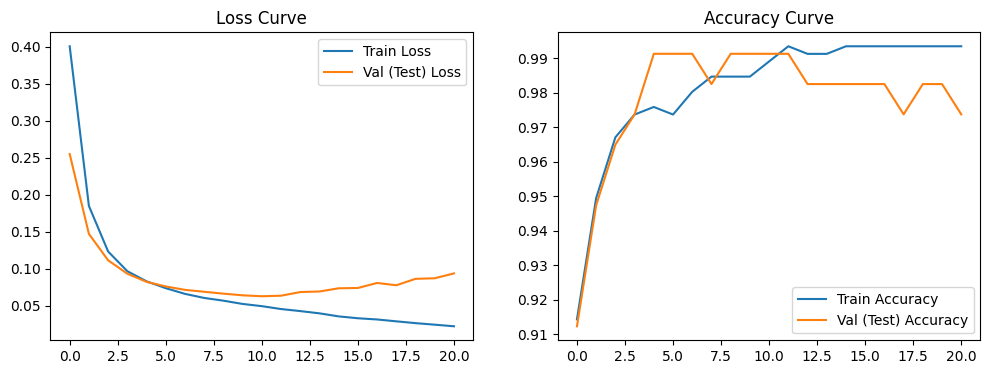

In [12]:
# STEP 5: Train

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,  # 8 is great for small data!

    # Edit 2: Use X_test instead of splitting X_train again
    # This keeps your Training set big (stratified) and
    # uses your Test set to check progress.
    validation_data=(X_test, y_test),

    callbacks=[early_stop],
    verbose=2
)

# ==========================================
#    Add this: PLOT THE LEARNING CURVE
# ==========================================
# Numbers in the console are hard to read. Charts are easy.
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val (Test) Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val (Test) Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [13]:
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix

# 1. Get the raw probabilities
y_pred_prob = model.predict(X_test)

# 2. Check thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

print(f"{'Threshold':<10} | {'Recall':<10} | {'Precision':<10} | {'Missed Cases'}")
print("-" * 60)

for t in thresholds:
    # Apply threshold
    preds = (y_pred_prob > t).astype(int)

    # Calculate scores
    rec = recall_score(y_test, preds)
    prec = precision_score(y_test, preds)

    # Count how many sick people we missed (False Negatives)
    cm = confusion_matrix(y_test, preds)
    missed_cases = cm[1][0] # Row 1 (Sick), Col 0 (Predicted Healthy)

    print(f"{t:<10} | {rec:.4f}     | {prec:.4f}        | {missed_cases}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Threshold  | Recall     | Precision  | Missed Cases
------------------------------------------------------------
0.1        | 0.9762     | 0.8913        | 1
0.2        | 0.9762     | 0.9111        | 1
0.3        | 0.9762     | 0.9318        | 1
0.4        | 0.9762     | 1.0000        | 1
0.5        | 0.9762     | 1.0000        | 1


In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# 1. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.3f}")

# 2. Predict
predictions = model.predict(X_test)

# we check if the probability is > 0.2
predicted_classes = (predictions > 0.2).astype("int32")


actual_classes = np.array(y_test)

# 3. Print Side-by-Side Comparison
print("\nFirst 10 Predictions:")
for i in range(10):
    print(f"Pred: {predicted_classes[i][0]} | Actual: {actual_classes[i]} | Prob: {predictions[i][0]:.4f}")

# 4. (Optional) Confusion Matrix - The best way to see the results
print("\nConfusion Matrix:")
print(confusion_matrix(actual_classes, predicted_classes))

print("\nClassification Report:")
print(classification_report(actual_classes, predicted_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9912 - loss: 0.0629

✅ Test Accuracy: 0.991
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

First 10 Predictions:
Pred: 0 | Actual: 0 | Prob: 0.0001
Pred: 1 | Actual: 1 | Prob: 1.0000
Pred: 0 | Actual: 0 | Prob: 0.1245
Pred: 1 | Actual: 1 | Prob: 0.6974
Pred: 1 | Actual: 0 | Prob: 0.3742
Pred: 0 | Actual: 0 | Prob: 0.0001
Pred: 1 | Actual: 1 | Prob: 0.9197
Pred: 0 | Actual: 0 | Prob: 0.0017
Pred: 0 | Actual: 0 | Prob: 0.0002
Pred: 0 | Actual: 0 | Prob: 0.0030

Confusion Matrix:
[[68  4]
 [ 1 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
# Save the entire model (architecture + weights + optimizer state) & save the scaler
model.save("Breast_Cancer.keras")
print("Model saved to disk!")

import joblib
# This file remembers the "Mean" and "Std Dev" of your training data
joblib.dump(scaler, 'breast_cancer_scaler.pkl')

Model saved to disk!


['breast_cancer_scaler.pkl']

In [16]:
# if already trained
from tensorflow.keras.models import load_model

# Load the model you trained before
model = load_model("Breast_Cancer.keras")

print("Model loaded! Ready to predict.")

Model loaded! Ready to predict.


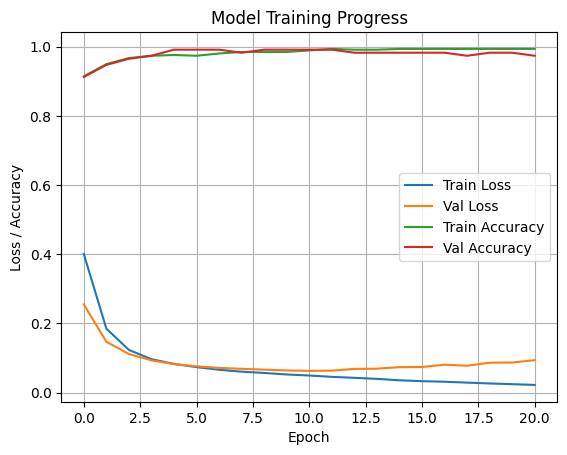

In [17]:
#Visualization
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.title('Model Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
model.save("Breast_Cancer.keras")
joblib.dump(scaler, 'breast_cancer_scaler.pkl')

['breast_cancer_scaler.pkl']